In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
import numpy as np
df1 = df.pivot_table(values='name',index='race',columns='signs_of_mental_illness',aggfunc='size')
df1

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [4]:
df1['Sum'] = df1.iloc[:, 0] + df1.iloc[:, 1]
df1

signs_of_mental_illness,False,True,Sum
race,,,
A,69,24,93
B,1114,184,1298
H,745,157,902
N,64,14,78
O,37,11,48
W,1763,713,2476


In [5]:
df1['percentage_of_mental_illness'] = df1.apply(lambda row: round((row[1] / row[2]) * 100, 2), axis=1)
df1

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_1748\681796271.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1['percentage_of_mental_illness'] = df1.apply(lambda row: round((row[1] / row[2]) * 100, 2), axis=1)


signs_of_mental_illness,False,True,Sum,percentage_of_mental_illness
race,,,,
A,69,24,93,25.81
B,1114,184,1298,14.18
H,745,157,902,17.41
N,64,14,78,17.95
O,37,11,48,22.92
W,1763,713,2476,28.80


In [6]:
print("Największy odsetek znamion choroby psychicznej podczas interwencji zaobserwowano dla rasy W")

Największy odsetek znamion choroby psychicznej podczas interwencji zaobserwowano dla rasy W


In [7]:
df['date'] = pd.to_datetime(df['date'])
df['Day_of_Week'] = df['date'].dt.day_name()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Day_of_Week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [8]:
df2 = df.groupby('Day_of_Week').count()
df2

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
Day_of_Week,,,,,,,,,,,,,,
Friday,761,761,761,761,729,715,761,674,761,761,761,761,722,761
Monday,726,726,726,726,698,700,726,671,726,726,726,726,696,726
Saturday,721,721,721,721,687,695,720,648,721,721,721,721,691,721
Sunday,753,753,753,753,722,722,753,675,753,753,753,753,731,753
Thursday,810,810,810,810,785,775,810,734,810,810,810,810,767,810
Tuesday,816,816,816,816,781,789,815,735,816,816,816,816,770,816
Wednesday,829,829,829,829,787,785,829,758,829,829,829,829,790,829


In [9]:
columns_to_drop = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
df3 = df2.drop(df2.columns[columns_to_drop], axis=1)
df3

,id
Day_of_Week,
Friday,761
Monday,726
Saturday,721
Sunday,753
Thursday,810
Tuesday,816
Wednesday,829


In [10]:
new_order = [1, 5, 6, 4, 0, 2, 3]  # Nowa kolejność wierszy
df3 = df3.iloc[new_order]
df3

,id
Day_of_Week,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


In [11]:
df3.rename(columns={'id':'value'}, inplace=True)
df3

,value
Day_of_Week,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


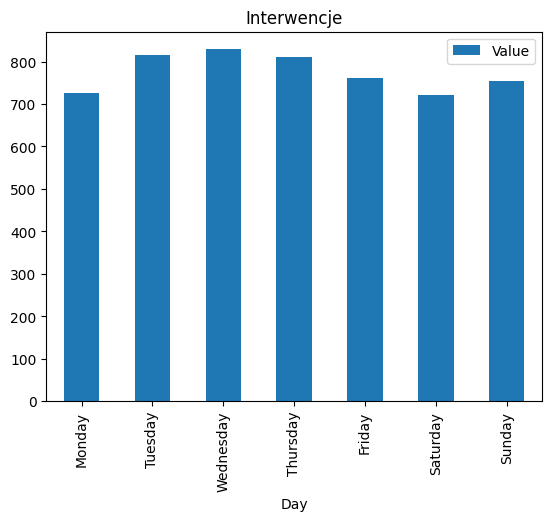

In [12]:
import matplotlib.pyplot as plt
df4 = pd.DataFrame({
    'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Value': [726, 816, 829, 810, 761, 721, 753]})
df4.plot(x='Day', y='Value', kind='bar')
plt.title('Interwencje')
plt.show()

In [13]:
stany = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
df5 = stany[0]
df5

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,38538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


In [14]:
skróty = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
df6 = skróty[0]
df6

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO a

In [15]:
columns_to_drop = [0, 1, 4, 5, 6, 7, 8, 9, 10]
df5 = df5.drop(df5.columns[columns_to_drop], axis=1)
df5

,State,"Census population, April 1, 2020 [1][2]"
0,California,38538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700
5,Illinois,12812508
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


In [16]:
df5 = df5.rename(columns={df5.columns[0]: 'stan', df5.columns[1]: 'ludność'})
df5

,stan,ludność
0,California,38538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700
5,Illinois,12812508
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


In [17]:
columns_to_drop = [1, 2, 3, 4, 6, 7, 8, 9]
df6 = df6.drop(df6.columns[columns_to_drop], axis=1)
df6

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5"
0,Codes:,NaN
1,ISO,NaN
2,ANSI,NaN
3,USPS,NaN
4,USCG,NaN
...,...,...
83,Nebraska,NB
84,Northern Mariana Islands,CM
85,Panama Canal Zone,CZ
86,Philippine Islands,PI


In [18]:
df6 = df6.rename(columns={df6.columns[0]: 'stan', df6.columns[1]: 'skrót'})
df6

,stan,skrót
0,Codes:,NaN
1,ISO,NaN
2,ANSI,NaN
3,USPS,NaN
4,USCG,NaN
...,...,...
83,Nebraska,NB
84,Northern Mariana Islands,CM
85,Panama Canal Zone,CZ
86,Philippine Islands,PI


In [19]:
df6.dropna()

,stan,skrót
8,Name and status of region,USPS
11,Alabama,AL
12,Alaska,AK
13,Arizona,AZ
14,Arkansas,AR
...,...,...
83,Nebraska,NB
84,Northern Mariana Islands,CM
85,Panama Canal Zone,CZ
86,Philippine Islands,PI


In [20]:
df7 = df.rename(columns={df.columns[9]: 'stan'}, inplace=True)
df7

In [21]:
polaczone_tabele = pd.merge(df5, df6, on='stan')
polaczone_tabele

,stan,ludność,skrót
0,California,38538223,CA
1,Texas,30145505,TX
2,Florida,21538187,FL
3,New York,20201249,NY
4,Pennsylvania,13002700,PA
5,Illinois,12812508,IL
6,Ohio,11799448,OH
7,Georgia,10711908,GA
8,North Carolina,10439388,NC
9,Michigan,10077331,MI


In [22]:
df8 = polaczone_tabele.sort_values(by='skrót')
df8

,stan,ludność,skrót
49,Alaska,733391,AK
23,Alabama,5024279,AL
33,Arkansas,3011524,AR
55,American Samoa,49710,AS
13,Arizona,7151502,AZ
0,California,38538223,CA
57,Northern Mariana Islands,47329,CM
20,Colorado,5773714,CO
28,Connecticut,3605944,CT
50,District of Columbia,689545,DC


In [23]:
df9 = df8.rename(columns={df8.columns[0]: 'stany', df8.columns[2]: 'stan'}, inplace=True)
df9

In [24]:
tabela1_grupowana = df.groupby('stan').count().reset_index()
tabela1_grupowana

,stan,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,Day_of_Week
0,AK,39,39,39,39,39,38,39,36,39,39,39,36,39,39
1,AL,104,104,104,104,98,99,104,95,104,104,104,102,104,104
2,AR,83,83,83,83,80,79,83,73,83,83,83,77,83,83
3,AZ,254,254,254,254,241,244,254,222,254,254,254,244,254,254
4,CA,799,799,799,799,766,738,799,701,799,799,799,761,799,799
5,CO,195,195,195,195,187,181,195,168,195,195,195,186,195,195
6,CT,21,21,21,21,19,21,21,20,21,21,21,20,21,21
7,DC,13,13,13,13,13,13,13,13,13,13,13,13,13,13
8,DE,13,13,13,13,11,13,13,10,13,13,13,13,13,13
9,FL,350,350,350,350,335,336,350,324,350,350,350,336,350,350


In [25]:
tabela_polaczona = pd.merge(tabela1_grupowana, df8, on='stan')
tabela_polaczona

,stan,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,Day_of_Week,stany,ludność
0,AK,39,39,39,39,39,38,39,36,39,39,39,36,39,39,Alaska,733391
1,AL,104,104,104,104,98,99,104,95,104,104,104,102,104,104,Alabama,5024279
2,AR,83,83,83,83,80,79,83,73,83,83,83,77,83,83,Arkansas,3011524
3,AZ,254,254,254,254,241,244,254,222,254,254,254,244,254,254,Arizona,7151502
4,CA,799,799,799,799,766,738,799,701,799,799,799,761,799,799,California,38538223
5,CO,195,195,195,195,187,181,195,168,195,195,195,186,195,195,Colorado,5773714
6,CT,21,21,21,21,19,21,21,20,21,21,21,20,21,21,Connecticut,3605944
7,DC,13,13,13,13,13,13,13,13,13,13,13,13,13,13,District of Columbia,689545
8,DE,13,13,13,13,11,13,13,10,13,13,13,13,13,13,Delaware,989948
9,FL,350,350,350,350,335,336,350,324,350,350,350,336,350,350,Florida,21538187


In [26]:
tabela_polaczona['ile_na_tys'] = round((tabela_polaczona.iloc[:, 2] / (tabela_polaczona.iloc[:, 16] / 1000)), 3)
tabela_polaczona

,stan,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,Day_of_Week,stany,ludność,ile_na_tys
0,AK,39,39,39,39,39,38,39,36,39,39,39,36,39,39,Alaska,733391,0.053
1,AL,104,104,104,104,98,99,104,95,104,104,104,102,104,104,Alabama,5024279,0.021
2,AR,83,83,83,83,80,79,83,73,83,83,83,77,83,83,Arkansas,3011524,0.028
3,AZ,254,254,254,254,241,244,254,222,254,254,254,244,254,254,Arizona,7151502,0.036
4,CA,799,799,799,799,766,738,799,701,799,799,799,761,799,799,California,38538223,0.021
5,CO,195,195,195,195,187,181,195,168,195,195,195,186,195,195,Colorado,5773714,0.034
6,CT,21,21,21,21,19,21,21,20,21,21,21,20,21,21,Connecticut,3605944,0.006
7,DC,13,13,13,13,13,13,13,13,13,13,13,13,13,13,District of Columbia,689545,0.019
8,DE,13,13,13,13,11,13,13,10,13,13,13,13,13,13,Delaware,989948,0.013
9,FL,350,350,350,350,335,336,350,324,350,350,350,336,350,350,Florida,21538187,0.016
